In [5]:
import geopandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

   fid                                           geometry
0  1.0  LINESTRING (-75.01600 -7.73408, -75.01099 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
epsg:4326


<AxesSubplot:>

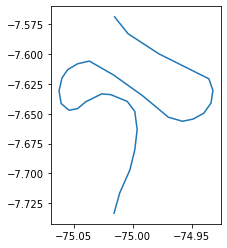

In [3]:
import geopandas as gpd

# Ruta al archivo Shapefile
shapefile_path = './Original.shp'

# Leer el archivo Shapefile y crear un GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Imprimir información básica sobre el GeoDataFrame
print(gdf.head())  # Muestra los primeros registros
print(gdf.info())  # Muestra información sobre las columnas y tipos de datos
print(gdf.crs)     # Muestra el sistema de referencia de coordenadas (CRS)

# Visualizar el GeoDataFrame en un gráfico
gdf.plot()


   fid                                           geometry
0  1.0  LINESTRING (-75.01600 -7.73408, -75.01099 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
epsg:4326
   fid                                           geometry
0  1.0  LINESTRING (-75.01441 -7.73509, -75.00508 -7.7...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fid       1 non-null      float64 
 1   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 144.0 bytes
None
epsg:4326


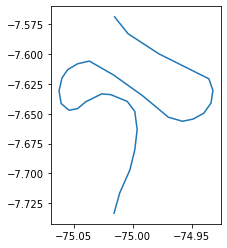

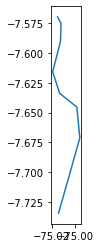

In [7]:
import geopandas as gpd

def cargar_geodataframe(ruta):
    gdf = gpd.read_file(ruta)
    print(gdf.head())
    print(gdf.info())
    print(gdf.crs)
    gdf.plot()

# Rutas a los archivos Shapefile
ruta_original = './Original.shp'
ruta_migracion = './Migracion.shp'

# Cargar y mostrar el GeoDataFrame para el archivo Original
cargar_geodataframe(ruta_original)

# Cargar y mostrar el GeoDataFrame para el archivo de Migración
cargar_geodataframe(ruta_migracion)


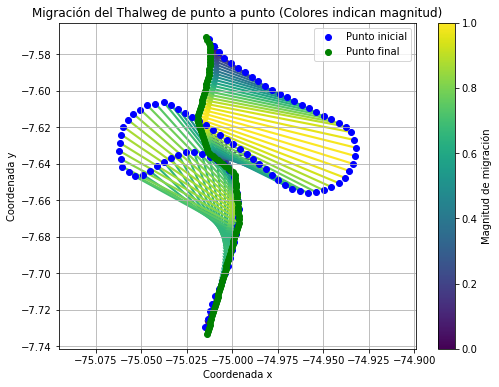

In [13]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para normalizar y asignar colores
def color_mapper(values, cmap='viridis', log_norm=True):
    if log_norm:
        norm = LogNorm(vmin=np.min(values), vmax=np.max(values))
    else:
        norm = Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = plt.get_cmap(cmap)
    return cmap(norm(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis', log_norm=False)
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Magnitud de migración')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


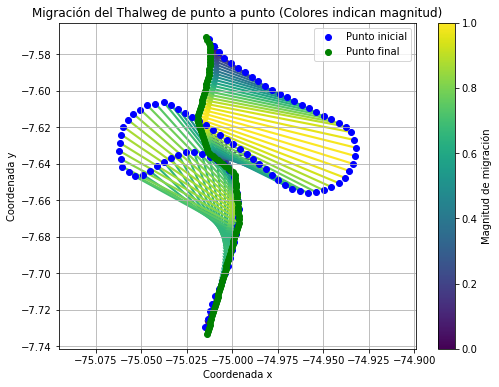

In [14]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis', log_norm=False):
    norm = Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = plt.get_cmap(cmap)
    return cmap(norm(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis', log_norm=False)
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Magnitud de migración')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


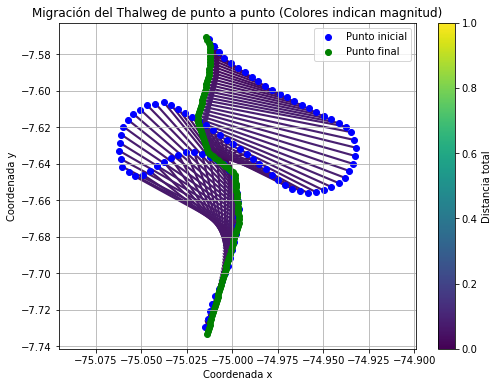

In [16]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values)

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


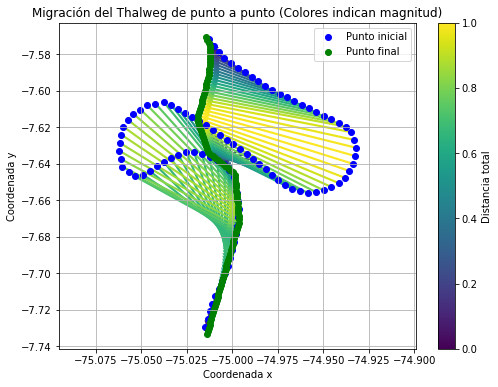

In [48]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values / np.max(values))  # Dividir por el máximo valor para obtener la escala correcta

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


         O_y        O_x
0  -7.729734 -75.014765
1  -7.725391 -75.013529
2  -7.721048 -75.012293
3  -7.716706 -75.011057
4  -7.712571 -75.009248
..       ...        ...
95 -7.584774 -75.000804
96 -7.582139 -75.004431
97 -7.578626 -75.007267
98 -7.575112 -75.010102
99 -7.571598 -75.012938

[100 rows x 2 columns]
         O_y        O_x       M_y        M_x       NN_x      NN_y
0  -7.729734 -75.014765 -7.733394 -75.013921 -75.012946 -7.730001
1  -7.725391 -75.013529 -7.731698 -75.013433 -75.011971 -7.726608
2  -7.721048 -75.012293 -7.730001 -75.012946 -75.010508 -7.721518
3  -7.716706 -75.011057 -7.728305 -75.012458 -75.009046 -7.716428
4  -7.712571 -75.009248 -7.726608 -75.011971 -75.008071 -7.713035
..       ...        ...       ...        ...        ...       ...
95 -7.584774 -75.000804 -7.577142 -75.012191 -75.012404 -7.584200
96 -7.582139 -75.004431 -7.575378 -75.012138 -75.012351 -7.582436
97 -7.578626 -75.007267 -7.573792 -75.012864 -75.012244 -7.578907
98 -7.575112 -75.010102 -7.5

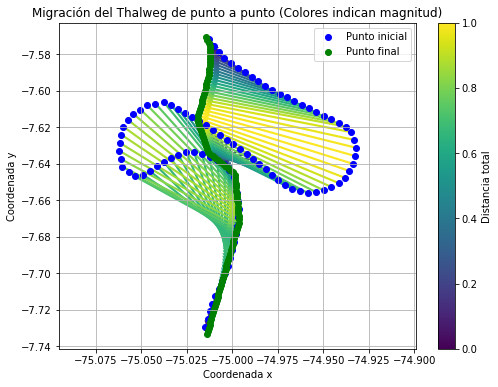

In [6]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Original.shp')
gdf_migracion = gpd.read_file('./Migracion.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Almacenar las coordenadas y y x en listas separadas
y_values = [p.y for p in points_original]
x_values = [p.x for p in points_original]

# Crear un DataFrame con columnas para coordenadas y y x
df = pd.DataFrame({'O_y': y_values, 'O_x': x_values})

# Mostrar el DataFrame
print(df)

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Almacenar las coordenadas y y x en listas separadas para migración
y_values_migracion = [p.y for p in points_migracion]
x_values_migracion = [p.x for p in points_migracion]

# Agregar las columnas correspondientes al DataFrame para migración
df['M_y'] = y_values_migracion
df['M_x'] = x_values_migracion

# Mostrar el DataFrame actualizado
df['NN_x'] = np.nan
df['NN_y'] = np.nan

# Calcular las coordenadas más cercanas en migración para cada punto original
for index, row in df.iterrows():
    original_point = np.array([row['O_x'], row['O_y']])
    migration_points = df[['M_x', 'M_y']].values
    distances = cdist([original_point], migration_points)[0]
    nearest_index = np.argmin(distances)
    nearest_migracion = migration_points[nearest_index]
    df.at[index, 'NN_x'] = nearest_migracion[0]
    df.at[index, 'NN_y'] = nearest_migracion[1]

# Mostrar el DataFrame actualizado
print(df)


# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values/np.max(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()


In [3]:
import geopandas as gpd

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('Original.shp')
gdf_final = gpd.read_file('Migracion.shp')

# Comprobar que las coordenadas estén en el mismo sistema de referencia
if gdf_original.crs != gdf_final.crs:
    raise ValueError("Las capas no tienen el mismo sistema de referencia espacial.")

# Extraer las geometrías de las líneas
lines_original = gdf_original['geometry']
lines_final = gdf_final['geometry']


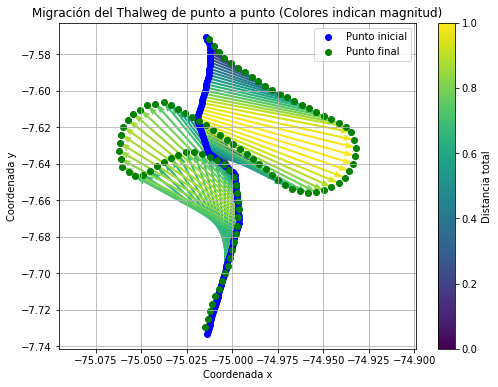

In [8]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Cargar los GeoDataFrames desde los archivos shapefile
gdf_original = gpd.read_file('./Migracion.shp')
gdf_migracion = gpd.read_file('./Original.shp')

# Obtener las geometrías de las líneas de los GeoDataFrames
line_original = gdf_original['geometry'].iloc[0]  # Supongamos que solo hay una línea en cada GeoDataFrame
line_migracion = gdf_migracion['geometry'].iloc[0]

# Remuestreo de las líneas para obtener puntos equidistantes
num_points = 100
# Crear puntos equidistantes en la línea original
points_original = [line_original.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Crear puntos equidistantes en la línea de migración
points_migracion = [line_migracion.interpolate((i+1)/(num_points+1), normalized=True) for i in range(num_points)]

# Calcular la migración del thalweg de punto a punto
migration_vectors = np.array([(p_migracion.x - p_original.x, p_migracion.y - p_original.y) for p_original, p_migracion in zip(points_original, points_migracion)])

# Calcular las magnitudes de las migraciones
migration_magnitudes = np.linalg.norm(migration_vectors, axis=1)

# Función para asignar colores
def color_mapper(values, cmap='viridis'):
    cmap = plt.get_cmap(cmap)
    return cmap(values/np.max(values))

# Crear un nuevo gráfico para representar los vectores de migración con colores
plt.figure(figsize=(8, 6))
colors = color_mapper(migration_magnitudes, cmap='viridis')
plt.quiver([p_original.x for p_original in points_original], [p_original.y for p_original in points_original],
           migration_vectors[:, 0], migration_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=colors)
plt.scatter([p_original.x for p_original in points_original], [p_original.y for p_original in points_original], color='blue', label='Punto inicial')
plt.scatter([p_migracion.x for p_migracion in points_migracion], [p_migracion.y for p_migracion in points_migracion], color='green', label='Punto final')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Migración del Thalweg de punto a punto (Colores indican magnitud)')
plt.colorbar(label='Distancia total')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Mostrar el gráfico
plt.show()
